**Q1 a)**

In [ ]:
import numpy as np


P = np.array([[0.2, 0.7, 0.1],
              [0.2, 0.5, 0.3],
              [0.2, 0.4, 0.4]])



print("Transition Matrix:")
print(P)

Transition Matrix:
[[0.2 0.7 0.1]
 [0.2 0.5 0.3]
 [0.2 0.4 0.4]]


**Q1 b)**


In [ ]:
states = [1]
current_state = 1
steps = 10

for step in range(steps):
  current_prob = P[current_state - 1, :]
  current_state = np.random.choice(np.arange(0, 3), p=current_prob.tolist())
  states.append(current_state + 1)

print(states)

[1, 2, 3, 2, 1, 2, 2, 2, 2, 1, 3]


**Q2 b)**

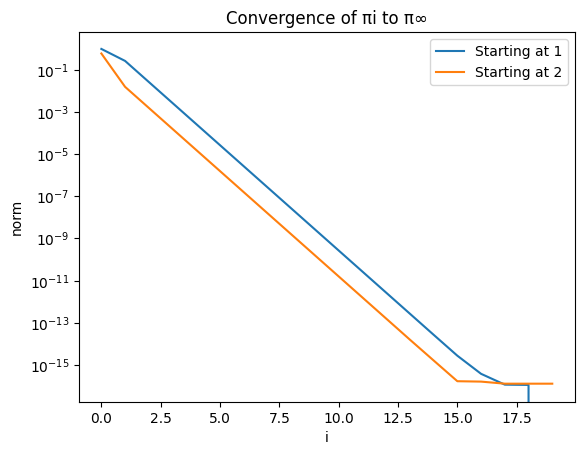

In [ ]:
import matplotlib.pyplot as plt

P = np.array([[0.2, 0.7, 0.1],
              [0.2, 0.5, 0.3],
              [0.2, 0.4, 0.4]])
pi_a = np.array([1/5, 23/45, 13/45])

steps = 20
def norm(P, initial_state, steps):
    norms = np.zeros(steps)
    X = initial_state.copy()

    for step in range(steps):
        #compute pi inf first
        norms[step] = np.linalg.norm(X - pi_a)  #incorporate A)
        X = np.matmul(X, P)

    return norms

cond1 = np.array([1, 0, 0], dtype=float)
cond2 = np.array([0, 1, 0], dtype=float)

sol1 = norm(P, cond1, steps)
sol2 = norm(P, cond2, steps)

plt.plot(range(steps), sol1, label='Starting at 1')
plt.plot(range(steps), sol2, label='Starting at 2')
plt.xlabel('i')
plt.ylabel('norm')
plt.yscale('log')
plt.legend()
plt.title('Convergence of πi to π∞')
plt.show()


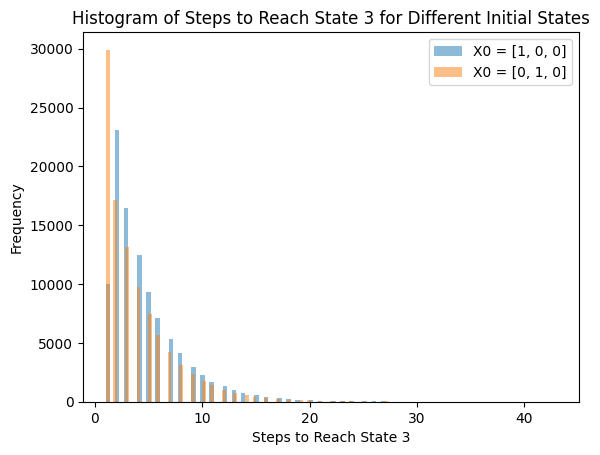

Starting in State 1 (mean): 4.61037
Starting in State 1 (mean): 3.83347


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sim_MC(P, X0, target_state, max_steps=100):
  count = 0
  current_state = X0
  for step in range(max_steps):
    current_prob = P[current_state - 1, :]
    #print(current_prob)
    current_state = np.random.choice(np.arange(0, 3), p=current_prob.tolist()) + 1
    #print(current_state)
    count = count + 1
    if current_state == 3:
      return count
  return max_steps



P = np.array([[0.2, 0.7, 0.1],
              [0.2, 0.5, 0.3],
              [0, 0, 1]])

arr1 = []
arr2 = []

for i in range(100000):
  arr1.append(sim_MC(P, 1, 3))

  arr2.append(sim_MC(P, 2, 3))

#print(arr1)
#print(arr2)

plt.hist(arr1, bins=100, alpha=0.5, label='X0 = [1, 0, 0]')
plt.hist(arr2, bins=100, alpha=0.5, label='X0 = [0, 1, 0]')

plt.xlabel('Steps to Reach State 3')
plt.ylabel('Frequency')
plt.title('Histogram of Steps to Reach State 3 for Different Initial States')
plt.legend()
plt.show()

print("Starting in State 1 (mean): " + str(sum(arr1) / len(arr1)))
print("Starting in State 1 (mean): " + str(sum(arr2) / len(arr2)))

In [ ]:
3.85
4.6

4.6